<a href="https://colab.research.google.com/github/johhan27/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/Copy_of_LS_DS_421_Architect_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras and a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. 

### Objective

- Build a baseline classification model then, run a few experiments with different optimizers and learning rates. 
- Don't forget to [**switch to GPU if you're running your notebook on Colab!**](https://colab.research.google.com/notebooks/gpu.ipynb)

## Load Your Data

In [1]:
# imports in first cell 
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# use Sequential to build out your model
from tensorflow.keras.models import Sequential

# Dense layer is used for Fully Connected Forward Feeding networks
from tensorflow.keras.layers import Dense

In [2]:
# load in data set
data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']


print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [3]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']

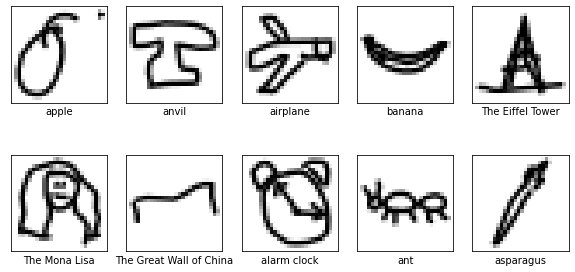

In [4]:
# these are your 10 unique images
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

Say hello to the Quickdraw dataset. 

You'll be using this dataset a lot this week as an alternative to the mnist, which we'll use in the guided projects. The nice thing about this dataset is that it's simple, which allows us to focus on our model, its various components, and gradually come to a better understanding of how to build neural networks without worrying about cleaning and prepping our image data much.

In [5]:
# always a good idea to shuffle your dataset 
X, y = shuffle(X, y)

-----

## Build Your Baseline Model

Make sure that you

- **Determine** the dimensionality of your input data by investigating **X**
- **Normalize** your input data to values between 0 and 1 
- **Determine** the number of neurons in your output layer by investigating **Y**
- **Select** `sparse_categorical_crossentropy` as your loss function.
- **Select** `sgd` as your optimizer.
- **Add** 3 hidden layers to your model with the following number of nodes
    - h1 has 500 nodes
    - h2 has 250 nodes
    - h3 has 100 nodes
    
- **Set** epochs to 20 
- **Use** the `validation_split` command to create a training/validation dataset within the model automatically, so you don't have to do it yourself.
    -  Specify a percentage such as .2 in your fit statement.
 
 
Not sure what the various parameters are for or what values to assign to them?

- Reference the guided project notebook for Sprint 2 Module 1
- Reference the [**Keras documentation**](https://keras.io/api/)
- Google other examples
- Discuss your results with classmates 

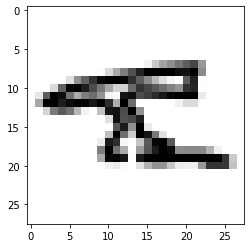

In [6]:
plt.imshow(X[25000].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [7]:
y[25000]

1

In [8]:
test = X[25000].copy().reshape(28,28)
test = pd.DataFrame(test)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,56,91,113,139,162,184,103,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,3,38,84,129,174,220,254,255,255,255,241,238,255,115,0,0,0,0,0
9,0,0,0,0,0,32,111,156,203,245,255,255,249,207,162,117,71,33,9,0,164,223,2,0,0,0,0,0


In [9]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
# get dim of image row vectors and save to input_dim

input_dim = 784

# get number of unique labels and save to n_output_nodels

n_output_nodels = 10

# normalize image data to values between 0 and 1 (by dividing by max pixel value)

max_value = 255
X_scaled = X.astype('float32') / max_value


# YOUR CODE HERE
#raise NotImplementedError()

In [11]:
# a check on your data prep 
assert  X_scaled.max(), "Max pixel value should be 1.0, make sure you normalize your data"

In [12]:
"""
Make sure that you
Determine the dimensionality of your input data by investigating X
Normalize your input data to values between 0 and 1
Determine the number of neurons in your output layer by investigating Y
Select sparse_categorical_crossentropy as your loss function.
Select sgd as your optimizer.
Add 3 hidden layers to your model with the following number of nodes
h1 has 500 nodes
h2 has 250 nodes
h3 has 100 nodes
Set epochs to 20
Use the validation_split command to create a training/validation dataset within the model automatically, so you don't have to do it yourself.
Specify a percentage such as .2 in your fit statement.
Not sure what the various parameters are for or what values to assign to them?
"""

# instantiate a sequential object and call it model, then add layers to your model

model = Sequential()
#model.add(Dense(1000, activation='relu', input_dim=input_dim ))
model.add(Dense(500, activation='relu', input_dim=input_dim))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# add a compile layer but don't fit your model yet 

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# YOUR CODE HERE
#raise NotImplementedError()

In [13]:
# a check on your model architecture 
n_layers = len(model.get_config()["layers"])
for _ in model.get_config()["layers"]:
  print (_)
assert n_layers == 5, "You should have 5 layers: input, h1, h2, h3, and output"

{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}}
{'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 500, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}
{'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 250, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': 

In [14]:
# check out your model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 100)               25100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit your model and save training resuts to history 

epochs = 20
history = model.fit(X_scaled, y, 
                    epochs=epochs, 
                    # test set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.9798 - accuracy: 0.7124 - val_loss: 0.7250 - val_accuracy: 0.7911
Epoch 2/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6618 - accuracy: 0.8070 - val_loss: 0.6034 - val_accuracy: 0.8208
Epoch 3/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5653 - accuracy: 0.8324 - val_loss: 0.5410 - val_accuracy: 0.8382
Epoch 4/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5020 - accuracy: 0.8490 - val_loss: 0.5093 - val_accuracy: 0.8478
Epoch 5/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.4561 - accuracy: 0.8644 - val_loss: 0.4843 - val_accuracy: 0.8556
Epoch 6/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4172 - accuracy: 0.8765 - val_loss: 0.4594 - val_accuracy: 0.8620
Epoch 7/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.3838 - accuracy: 0.8869 - val_loss: 0.4520 - val_accura

----
### Visualize the Results

- Move results in `history` to a dataframe. 
- Use [**Seaborn**](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to create line plots for both loss and accuracy by epoch. 
- Analyze the results and write a couple of observations. 

At what point should we have stopped training the model and why? 

In [16]:
type(history.history)

dict

In [21]:
# YOUR CODE HERE

df = pd.DataFrame.from_dict(history.history).astype('float64')

#raise NotImplementedError()

In [22]:
# a check on our model training
assert df.shape[0] == 20, "df should have the training results from 20 epochs"

In [23]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.979814,0.712412,0.725030,0.79105
1,0.661833,0.807012,0.603431,0.82080
2,0.565333,0.832350,0.541039,0.83820
3,0.502021,0.849025,0.509273,0.84775
4,0.456059,0.864350,0.484270,0.85560


In [25]:
df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.183844,0.946863,0.453115,0.87740
16,0.168020,0.952375,0.470211,0.87505
17,0.152716,0.957088,0.485398,0.87235
18,0.137572,0.961250,0.500888,0.87450
19,0.124047,0.965312,0.506384,0.87460


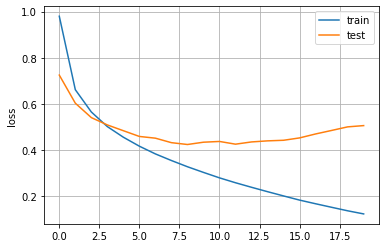

In [24]:
# use the plotting method in your dataframe to plot the modeling results 

epochs_array = [ i for i in range(epochs)]
sns.lineplot(x=epochs_array, y=df['loss'], label='train')
sns.lineplot(x=epochs_array, y=df['val_loss'], label='test')
plt.grid()


# YOUR CODE HERE
#raise NotImplementedError()

### Observations 

Based on the plot of the training and validation loss, answer the following questions. 

**Was our model able to learn throughout the 20 epochs? Why or why not?**

Yes, it was able to learn throught the epoch because the loss decreased at each epoch 

**Is our model overfitting? Why or why not?**

I don't think it's overfitting since the validation score is good even though the training accuracy is significatly high on the training data 

**Could the model score benefit from additional epochs? Why or why not?**

Not, additional epochs would not affect the acc scores as we see them plateauing on the plot

-----
## Change Optimizers

Let's compare model performance between different optimizers. 
- Build a new model, identical to the last one but using `adam` for the optimizer. 
- Visualize the training results just as we did for the last model. 
- Save modeling results to adam_history, so we don't erase the results from the previous model run

In [26]:
# train same model as above but use sgd if you used adam previously (or use adam if you used sgd previously)

# YOUR CODE HERE

model = Sequential()
#model.add(Dense(1000, activation='relu', input_dim=input_dim ))
model.add(Dense(500, activation='relu', input_dim=input_dim))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# add a compile layer but don't fit your model yet 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#raise NotImplementedError()

In [27]:
adam_history = model.fit(X_scaled, y, 
                    epochs=epochs, 
                    # test set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6001 - accuracy: 0.8163 - val_loss: 0.4756 - val_accuracy: 0.8554
Epoch 2/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4148 - accuracy: 0.8736 - val_loss: 0.4353 - val_accuracy: 0.8698
Epoch 3/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.3426 - accuracy: 0.8955 - val_loss: 0.4098 - val_accuracy: 0.8791
Epoch 4/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2917 - accuracy: 0.9110 - val_loss: 0.4321 - val_accuracy: 0.8751
Epoch 5/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2495 - accuracy: 0.9228 - val_loss: 0.4482 - val_accuracy: 0.8789
Epoch 6/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2155 - accuracy: 0.9320 - val_loss: 0.4547 - val_accuracy: 0.8801
Epoch 7/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1860 - accuracy: 0.9410 - val_loss: 0.4707 - val_ac

In [28]:
adam_df = pd.DataFrame.from_dict(adam_history.history).astype('float64')

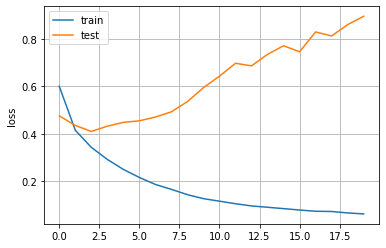

In [29]:
#epochs_array = [ i for i in range(epochs)]
sns.lineplot(x=epochs_array, y=adam_df['loss'], label='train')
sns.lineplot(x=epochs_array, y=adam_df['val_loss'], label='test')
plt.grid()


In [30]:
# a check that we're using the correct optimizer in this model
opt_name = model.optimizer.get_config()["name"]
assert opt_name == "Adam", "you need to use adam for the optimizer in this model."

### Observations 

This plot should look very different from the previous plot. Based on the plot of the training and validation loss, answer the following questions. 

**Is our model overfitting? Why or why not?**

Yes, this time is overfitting since the train-test loss results are very far from each other at each passing epoch

**Could our model's performance improve by training on more than 20 epochs? Why or why not?**

No, the trend is very clear, more epochs would even widen the train-test loss gap

**Assuming that you want to stick to this model architecture, what can you do to avoid overfitting?**

Setting the epoch to 3 perhaps

------
# Conclusion 

You have observed by comparing the two identical models, except for the optimizer, that the choice of the optimizer can considerably influence the training outcome of ML models in general and in neural networks in particular. 

You might not know 

- why changing the optimizer from Stochastic Gradient Descent over to Adam made a difference.
- how Gradient Descent works 
- or that Adam is known as Adaptive Gradient Descent (i.e., is it a different version of ordinary Gradient Descent). 

But that's ok - tomorrow's lesson will be a deep dive into Gradient Descent. You'll learn the theory of Gradient Descent, we'll code up Gradient Descent from scratch, and we'll talk about how Adam is different from ordinary Gradient Descent. 

-----
# Preparation for Tomorrow 

In preparation for tomorrow, you might need to watch a few videos. I say it might because you may or may not already be comfortable with multi-variate calculus. 

### Theory of Calculus 
The theory of Gradient Descent rests on [**the derivative from Calculus**](https://www.youtube.com/watch?v=WUvTyaaNkzM). If you've never taken a Calculus course before, or are a bit rusty, definitely watch this video in preparation for tomorrow's lesson. The takeaway here is to understand the derivative conceptually; you won't be asked to calculate any derivatives by hand. 

### The Gradient - a Multi-Dimensional Derivative
Once you've watched the previous video, you will be ready to understand how to conceptualize a derivative in an N-dimensional space (where N is any number ranging from 2, 3, 4, ..., all the way to a very large number of dimensions N ). [**This video visually explains the multi-dimensional derivative called the Gradient visually**](https://www.youtube.com/watch?v=GkB4vW16QHI) - and that's the takeaway. The point of this video is to help you understand the Gradient visually using 3D surfaces. You should also know that the Gradient is made up of partial derivatives, more on this tomorrow. 

### Contour Maps 
It is very common to visual 3D surfaces as 2D contour maps - and we'll be making a lot of use of contour maps to understand Gradient Descent. Watch this video to [**understand the relationship between 3D surfaces and 2D contour maps.**](https://www.youtube.com/watch?v=acdX4YamDtU)

### The Calculus of Backpropagation 

Unlike standard Sklearn ML models, neural networks use Gradient Descent and something called Backpropagatin to learn from the data. [**In order to understand how backpropagation works, you need to understand the Chain Rule in Calculus**](https://www.youtube.com/watch?v=acdX4YamDtU). The takeaway here is to understand how a partial derivative can be decomposed into a product of multiple derivatives. 

------
# Stretch Goals

### This Section is Optional!

Only after you've completed the above work and watched the recommended videos are you then encouraged to experiment with building a few more models and analyze their results. 

Here are some suggestions to help you get started. 

- Train the same model using the Sigmoid and Relu activation functions and note the difference in their learning outcomes. [**Keras docs on activation fucntions**](https://keras.io/api/layers/activations/). We'll cover the Relu activation function in Sprint 2 Module 3.
- Train the same model using normalized and non-normalized data and note the difference in their learning outcomes. 


The objective here is to get more practice with the Keras API (i.e., building models) and run a couple of experiments to help set you up for future lessons. In order words, we'll be discussing different activation functions and the effect of normalized data on model training.